In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib 
import matplotlib.pyplot as plt
import os, glob
import numpy as np
import pandas as pd
from keras.models import model_from_yaml

Using TensorFlow backend.


# 1. Data Processing:

**a) Using the "ImageDataGenerator()" class from keras.processing.image to build out an instance called "train_datagen" with the following parameters:** 

rescale = 1./255<br>shear_range = 0.2<br>zoom_range = 0.2<br>horizontal_flip = True

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

**b) building  training set by using the method ".flow_from_directory()"**

path (where training data is stored)<br>target_size = (64, 64)<br>batch_size = 32<br>class_mode = categorical 

In [6]:
train_generator = train_datagen.flow_from_directory('dataset_train', target_size = (64, 64), batch_size = 32, class_mode = 'categorical')

Found 88 images belonging to 4 classes.


**c) Examining the training set:** 



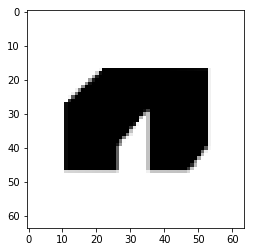

In [7]:
X_train, y_train = train_generator.next()
for i in range(0,1):
    images = X_train[i]
    plt.imshow(images)
    plt.show()

In [8]:
print("Image shape of each training observation is :" , images.shape)
print("We need to predict on", len(y_train[0]) ,"classes " )

Image shape of each training observation is : (64, 64, 3)
We need to predict on 4 classes 


## 2. Initial Classifier Build: 

**Creating an instance of Sequential called "classifier"**

In [9]:
classifier = Sequential()

**Add a Conv2D layer with the following parameters:** 

filters = 32<br>kernel_size = (3,3)<br>input_shape = image shape found in part 1<br>activation = relu

In [10]:
classifier.add(Conv2D(32, kernel_size=(3,3), activation= 'relu', input_shape= (64, 64, 3)))

**Add a MaxPooling2D layer where pool_size = (2,2)**

In [11]:
classifier.add(MaxPool2D(2,2))

**Add another Conv2D layer:** 

filters = 64<br>kernel_size = (3,3)<br>activation = relu

In [12]:
classifier.add(Conv2D(64, kernel_size=(3,3), activation= 'relu'))

**Add a MaxPooling2D layer where pool_size = (2,2)**

In [13]:
classifier.add(MaxPool2D(2,2))

**Add a Flatten layer**

In [14]:
classifier.add(Flatten())

**Add a Dense layer**

units = 128<br>activation = relu

In [15]:
classifier.add(Dense(128, activation= 'relu'))

**Add a final Dense layer (this will output our probabilities):**
    
units = # of classes<br>activation = softmax 

In [16]:
classifier.add(Dense(4, activation= 'softmax'))

**Compile with the following: **
    
optimize = adam<br>loss = categorical cross entropy<br>metric = accuracy

In [17]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 3. Model Runs:


**a) Using .fit_generator() with the training set. For the first run, using the following parameters:** 

steps_per_epoch = 10<br>epochs = 10

In [18]:
classifier.fit_generator(train_generator, steps_per_epoch = 10, epochs = 10)

Epoch 1/10
10/10 [==============================] - 5s 473ms/step - loss: 1.0607 - accuracy: 0.6284
Epoch 2/10
10/10 [==============================] - 5s 453ms/step - loss: 0.1968 - accuracy: 0.9595
Epoch 3/10
10/10 [==============================] - 5s 515ms/step - loss: 0.1280 - accuracy: 0.9653
Epoch 4/10
10/10 [==============================] - 5s 493ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 5s 541ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 5s 463ms/step - loss: 0.0177 - accuracy: 0.9899
Epoch 7/10
10/10 [==============================] - 6s 634ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 5s 541ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 5s 454ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 5s 475ms/step - loss: 0.0069 - accuracy: 0.9966

**b) Writing out each model & model_weights to a file.**

In [19]:
# write model and model weights to disk

model_yaml = classifier.to_yaml()
with open("model_1.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
classifier.save_weights("model_1.h5")
print("Saved model to disk")

Saved model to disk


**c) Predicting using the model built in step 2.**

In [20]:
# load model from disk
yaml_file = open('model_1.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(loaded_model_yaml)
# load weights into new model
model.load_weights("model_1.h5")
print("Loaded model from disk")
# test data path
img_dir = "dataset_test" # Enter Directory of all images
# iterate over each test image
# make a prediction and add to results 
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)
data = []
results = []
for f1 in files:
    img = image.load_img(f1, target_size = (64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    data.append(img)
    result = model.predict(img)
    r = np.argmax(result, axis=1)
    results.append(r)
 

Loaded model from disk


In [74]:
results

[array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([3], dtype=int64)]

**d) Determine accuracy.**

In [23]:
# check category labels
train_generator.class_indices

{'category 1': 0, 'category 2': 1, 'category 3': 2, 'category 4': 3}

In [24]:
actual_labels = [0, 0, 2, 2, 1, 1, 3, 3] 

In [25]:
#create function to check accuracy

def check_acc(x):
    count = 0
    for r in range(len(x)):
        if x[r]==actual_labels[r]:
            count = count + 1
    return count/8

In [26]:
check_acc(results)

0.75

In [27]:
# create function to write model and model weights to disk

def saveclassifier(classifier):
    model_yaml = classifier.to_yaml()
    with open("model_1.yaml", "w") as yaml_file:
        yaml_file.write(model_yaml)
    classifier.save_weights("model_1.h5")
    print("Saved model to disk")

In [28]:
# create function to get predictions

def getpreds(model):
    yaml_file = open('model_1.yaml', 'r')
    loaded_model_yaml = yaml_file.read()
    yaml_file.close()
    model = model_from_yaml(loaded_model_yaml)
    # load weights into new model
    model.load_weights("model_1.h5")
    print("Loaded model from disk")
    # test data path
    img_dir = "dataset_test" # Enter Directory of all images
    # iterate over each test image
    # make a prediction and add to results 
    data_path = os.path.join(img_dir, '*g')
    files = glob.glob(data_path)
    data = []
    results = []
    for f1 in files:
        img = image.load_img(f1, target_size = (64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        data.append(img)
        result = model.predict(img)
        r = np.argmax(result, axis=1)
        results.append(r)
    return check_acc(results)

In [29]:
getpreds(model)

Loaded model from disk


0.75

**e) Running this process for the following combinations:**

(steps_per_epoch: 10, epochs: 10) <- the one we just did 

(steps_per_epoch: 10, epochs: 20)

(steps_per_epoch: 10, epochs: 30)

(steps_per_epoch: 30, epochs: 10)

(steps_per_epoch: 30, epochs: 20)

(steps_per_epoch: 30, epochs: 30)

(steps_per_epoch: 50, epochs: 10)

(steps_per_epoch: 50, epochs: 20)

(steps_per_epoch: 50, epochs: 30)

(steps_per_epoch: 50, epochs: 100) 


In [30]:
epochs = [10,20,30]
steps = [10,30,50]

df = pd.DataFrame(columns = ["steps", "epochs", "Accuracy"])

In [31]:
for e in epochs:
    for s in steps:
        classifier.fit_generator(train_generator, steps_per_epoch = s, epochs = e)
        saveclassifier(classifier)
        acc = getpreds(classifier)
        df= df.append({"steps": s, "epochs": e, "Accuracy": acc}, ignore_index=True)

Epoch 1/10
10/10 [==============================] - 4s 441ms/step - loss: 0.0064 - accuracy: 0.9966
Epoch 2/10
10/10 [==============================] - 4s 434ms/step - loss: 0.0253 - accuracy: 0.9965
Epoch 3/10
10/10 [==============================] - 4s 441ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 4s 436ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 5s 452ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 4s 430ms/step - loss: 9.7912e-04 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 4s 449ms/step - loss: 8.2278e-04 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 4s 440ms/step - loss: 5.2475e-04 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 4s 432ms/step - loss: 2.7145e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 4s 448ms/step - loss: 0.0025 - 

50/50 [==============================] - 24s 471ms/step - loss: 2.6938e-07 - accuracy: 1.0000
Epoch 4/30
50/50 [==============================] - 25s 495ms/step - loss: 2.9430e-07 - accuracy: 1.0000
Epoch 5/30
50/50 [==============================] - 25s 498ms/step - loss: 3.1600e-07 - accuracy: 1.0000
Epoch 6/30
50/50 [==============================] - 24s 488ms/step - loss: 2.3626e-07 - accuracy: 1.0000
Epoch 7/30
50/50 [==============================] - 25s 498ms/step - loss: 2.7587e-07 - accuracy: 1.0000
Epoch 8/30
50/50 [==============================] - 25s 500ms/step - loss: 3.2406e-07 - accuracy: 1.0000
Epoch 9/30
50/50 [==============================] - 26s 511ms/step - loss: 2.2447e-07 - accuracy: 1.0000
Epoch 10/30
50/50 [==============================] - 26s 517ms/step - loss: 2.6540e-07 - accuracy: 1.0000
Epoch 11/30
50/50 [==============================] - 25s 500ms/step - loss: 1.9999e-07 - accuracy: 1.0000
Epoch 12/30
50/50 [==============================] - 25s 507ms/s

**f) Creating a final dataframe that combines the accuracy across each combination.**

In [32]:
df

,steps,epochs,Accuracy
0,10.0,10.0,0.75
1,30.0,10.0,0.75
2,50.0,10.0,0.75
3,10.0,20.0,0.75
4,30.0,20.0,0.75
5,50.0,20.0,0.75
6,10.0,30.0,0.75
7,30.0,30.0,0.75
8,50.0,30.0,0.75


In [76]:
classifier.fit_generator(train_generator, steps_per_epoch = 50, epochs = 100)
saveclassifier(classifier)
acc = getpreds(classifier)
df= df.append({"steps": 50, "epochs": 100, "Accuracy": acc}, ignore_index=True)

Epoch 1/100
50/50 [==============================] - 13s 260ms/step - loss: 4.6717e-09 - accuracy: 1.0000
Epoch 2/100
50/50 [==============================] - 13s 258ms/step - loss: 9.6462e-09 - accuracy: 1.0000
Epoch 3/100
50/50 [==============================] - 14s 272ms/step - loss: 4.1979e-09 - accuracy: 1.0000
Epoch 4/100
50/50 [==============================] - 14s 280ms/step - loss: 5.9601e-09 - accuracy: 1.0000
Epoch 5/100
50/50 [==============================] - 14s 288ms/step - loss: 5.8362e-09 - accuracy: 1.0000
Epoch 6/100
50/50 [==============================] - 13s 268ms/step - loss: 9.1925e-09 - accuracy: 1.0000
Epoch 7/100
50/50 [==============================] - 14s 280ms/step - loss: 3.1302e-09 - accuracy: 1.0000
Epoch 8/100
50/50 [==============================] - 15s 295ms/step - loss: 5.7356e-09 - accuracy: 1.0000
Epoch 9/100
50/50 [==============================] - 13s 267ms/step - loss: 7.6721e-09 - accuracy: 1.0000
Epoch 10/100
50/50 [==========================

In [77]:
df

,steps,epochs,Accuracy
0,10.0,10.0,0.75
1,30.0,10.0,0.75
2,50.0,10.0,0.75
3,10.0,20.0,0.75
4,30.0,20.0,0.75
5,50.0,20.0,0.75
6,10.0,30.0,0.75
7,30.0,30.0,0.75
8,50.0,30.0,0.75
9,50.0,30.0,0.75
